In [ ]:
# Importing necessary libraries
import os
import shutil
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.mo dels import Sequential, Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import tensorflow as tf

/Users/faheemjinna/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [6]:
# Loading the dataset & output path
original_dataset_path = '/Users/faheemjinna/Downloads/ML Project/Dataset_Disease'
output_path = '/Users/faheemjinna/Downloads/ML Project/output'

In [7]:
# List of crops to be used in classification
selected_crops = [
    "Apple__black_rot", 
    "Apple__healthy", 
    "Apple__rust", 
    "Apple__scab",
    "Cassava__bacterial_blight", 
    "Cassava__brown_streak_disease", 
    "Cassava__green_mottle",
    "Cassava__healthy", 
    "Cassava__mosaic_disease",
    "Grape__black_measles", 
    "Grape__black_rot", 
    "Grape__healthy", 
    "Grape__leaf_blight_(isariopsis_leaf_spot)",
    "Potato__early_blight", 
    "Potato__healthy", 
    "Potato__late_blight",
    "Rice__brown_spot", 
    "Rice__healthy", 
    "Rice__hispa", 
    "Rice__leaf_blast", 
    "Rice__neck_blast",
    "Sugarcane__bacterial_blight", 
    "Sugarcane__healthy", 
    "Sugarcane__red_stripe", 
    "Sugarcane__rust",
    "Tea__algal_leaf", 
    "Tea__anthracnose", 
    "Tea__bird_eye_spot", 
    "Tea__brown_blight",
    "Tea__healthy", 
    "Tea__red_leaf_spot",
    "Wheat__brown_rust", 
    "Wheat__healthy", 
    "Wheat__septoria", 
    "Wheat__yellow_rust"
]

In [8]:
# Defining split ratios for train, validation, and test datasets in the ratio of 80:10:10
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

# Creating directories for data splits
splits = ['train', 'val', 'test']

for split in splits:
    split_path = os.path.join(output_path, split)
    os.makedirs(split_path, exist_ok=True)

In [9]:
# Shuffling and spliting the dataset
for crop in selected_crops:
    crop_path = os.path.join(original_dataset_path, crop)
    if not os.path.isdir(crop_path):
        print(f"Warning: {crop_path} does not exist.")
        continue

    images = os.listdir(crop_path)
    random.shuffle(images)

    # Calculating split sizes
    train_size = int(len(images) * train_ratio)
    val_size = int(len(images) * val_ratio)

    # Creating train, validation, and test splits
    train_imgs = images[:train_size]
    val_imgs = images[train_size:train_size + val_size]
    test_imgs = images[train_size + val_size:]

    def copy_images(img_list, split):
        """Copies images to the corresponding train/val/test directories."""
        split_crop_path = os.path.join(output_path, split, crop)
        os.makedirs(split_crop_path, exist_ok=True)
        for img in img_list:
            src = os.path.join(crop_path, img)
            dest = os.path.join(split_crop_path, img)
            shutil.copy(src, dest)

    # Copying images to their respective directories
    copy_images(train_imgs, 'train')
    copy_images(val_imgs, 'val')
    copy_images(test_imgs, 'test')

print("Dataset splitting complete!")

Dataset splitting complete!


In [10]:
# Data augmentation for training dataset
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Rescale validation and test datasets
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Paths to the split datasets
train_path = os.path.join(output_path, 'train')
val_path = os.path.join(output_path, 'val')
test_path = os.path.join(output_path, 'test')

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_path, 
    target_size=(224, 224), 
    batch_size=32, 
    class_mode='categorical'
)
val_generator = val_test_datagen.flow_from_directory(
    val_path, 
    target_size=(224, 224), 
    batch_size=32, 
    class_mode='categorical'
)
test_generator = val_test_datagen.flow_from_directory(
    test_path, 
    target_size=(224, 224), 
    batch_size=32, 
    class_mode='categorical', 
    shuffle=False
)

Found 26265 images belonging to 35 classes.
Found 3271 images belonging to 35 classes.
Found 3311 images belonging to 35 classes.


/Users/faheemjinna/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
821/821 ━━━━━━━━━━━━━━━━━━━━ 859s 1s/step - accuracy: 0.3239 - loss: 7.3184 - val_accuracy: 0.3534 - val_loss: 2.7570
Epoch 2/20
821/821 ━━━━━━━━━━━━━━━━━━━━ 764s 929ms/step - accuracy: 0.3439 - loss: 2.5567 - val_accuracy: 0.3482 - val_loss: 2.5696
Epoch 3/20
821/821 ━━━━━━━━━━━━━━━━━━━━ 3437s 4s/step - accuracy: 0.3499 - loss: 2.4564 - val_accuracy: 0.3482 - val_loss: 3.1322
Epoch 4/20
821/821 ━━━━━━━━━━━━━━━━━━━━ 1308s 2s/step - accuracy: 0.3470 - loss: 2.4725 - val_accuracy: 0.3482 - val_loss: 2.6655
Epoch 5/20
821/821 ━━━━━━━━━━━━━━━━━━━━ 905s 1s/step - accuracy: 0.3547 - loss: 2.3687 - val_accuracy: 0.3901 - val_loss: 2.1424
Epoch 6/20
821/821 ━━━━━━━━━━━━━━━━━━━━ 999s 1s/step - accuracy: 0.3594 - loss: 2.3351 - val_accuracy: 0.3846 - val_loss: 2.3308
Epoch 7/20
821/821 ━━━━━━━━━━━━━━━━━━━━ 884s 1s/step - accuracy: 0.3618 - loss: 2.3207 - val_accuracy: 0.4081 - val_loss: 2.0701
Epoch 8/20
821/821 ━━━━━━━━━━━━━━━━━━━━ 826s 1s/step - accuracy: 0.3562 - loss: 2.3486 - val

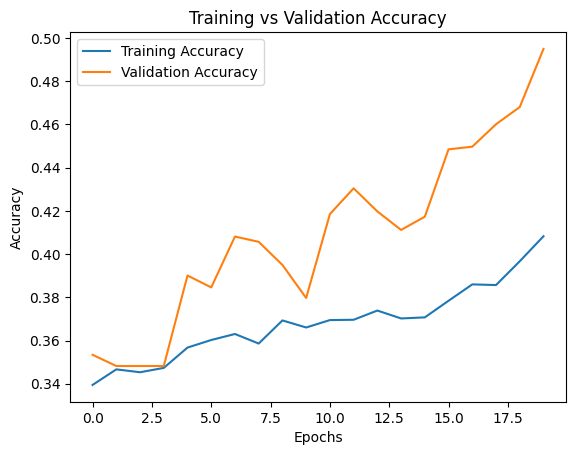

In [12]:
# Building an enhanced CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),  # Regularization to prevent overfitting
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for Early Stopping and Model Checkpointing
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)

# Training the model
history = model.fit(
    train_generator, epochs=20, validation_data=val_generator,
    callbacks=[early_stopping, checkpoint]
)

# Evaluating the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()